### import libraries

In [1]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import math

### set parameters and physical values 

In [2]:
nx = 64 # number of computational grids
dx = 0.5e-6 # spacing of computational grid [m]
eee = 5.e+5 # magnitude of driving force of growth of phase B: g_A - g_B [J/m3] = [Pa]
gamma = 1.0 # ineterfacial energy [J/m2]
delta = 4.*dx # interfacial thickness [m]
amobi = 4.e-14 # interfacial mobilitiy [m4/(Js)]
ram = 0.1 # paraneter which deternines the interfacial area
bbb = 2.*np.log((1.+(1.-2.*ram))/(1.-(1.-2.*ram)))/2.  # The constant b = 2.1972 (please see the handout)

### calculate phase-field parameters ($a, W$ and $M_{\phi}$)

In [3]:
aaa   = np.sqrt(3.*delta*gamma/bbb) # gradient energy coefficient  "a"[(J/m)^(1/2)]
www   = 6.*gamma*bbb/delta # potential height W [J/m3]
pmobi = amobi*math.sqrt(2.*www)/(6.*aaa) # mobility of phase-field [m3/(Js)]

### define time increment and total number of time steps

In [4]:
dt = dx*dx/(5.*pmobi*aaa*aaa)/2 # time increment for a time step [s]
nsteps = 500 # total number of time step

### declare arrays for phase field variable and others

In [5]:
p  = np.zeros((nsteps,nx)) # phase-field variable for all time steps
driv = np.zeros((nsteps,nx)) # array for saving driving force term (only for visualization)
grad = np.zeros((nsteps,nx)) # array for saving gradient force term (only for visualization)

### set initial distribution of phase-field variable (initial nuclei of phase B)
The initial nuclei of the phase B (region of $\phi = 1$) is located at the origin of the computational domain. 

The initial profile of the phase-field variable along $x$-direction is calculated using the equilibrium profile (see Appendix in the handout for the derivation): 
$$
\phi = \frac{1}{2}\left(1-\tanh \frac{\sqrt{2W}}{2a}(x-r_{0})  \right)
$$
where $r_{0}$ denotes the initial position of the interface. 

In [6]:
r_nuclei = 10.*dx # length of the initial B phase
for i in range(0,nx):
        r = i*dx - r_nuclei
        p[0,i] = 0.5*(1.-np.tanh(np.sqrt(2.*www)/(2.*aaa)*r))

### define function for solving Allen-Cahn equation
Allen-Cahn equation is discretized by simple finite difference method in this program. 

The 1st-order foward Euler method is used for the time-integration. The 2nd-order central finite difference method is used for the spatial derivatives. The discretized Allen-Cahn equation is given as: 
$$
\phi^{t+\Delta t}_{i} = \phi^{t}_{i} + M_{\phi}
\left[ 4W\phi^{t}_{i}\left(1-\phi^{t}_{i}\right)\left(\phi^{t}_{i}-\frac{1}{2}+\frac{3}{2W}(g_{A}-g_{B})\right)
+a^{2}\left(\frac{\phi^{t}_{i+1}-2\phi^{t}_{i}+\phi^{t}_{i-1}}{(\Delta x)^{2}}\right)
\right]\Delta t
$$

For visuallization, arrays "driv" and "grad" are saved. 

In [7]:
def do_timestep(p,driv,grad):
    for t in range(nsteps-1):
        for i in range(nx):
            ip = i + 1
            im = i - 1
            if ip > nx - 1:
                ip = nx -1
            if im < 0:
                im = 0
            p[t+1,i] = p[t,i] + pmobi * ( 4.*www*p[t,i]*(1.-p[t,i])*(p[t,i]-0.5+3./(2.*www)*eee) +  aaa*aaa*((p[t,ip] - 2*p[t,i] + p[t,im])/dx/dx) ) * dt
            driv[t+1,i] = pmobi*(4.*www*p[t,i]*(1.-p[t,i])*(p[t,i]-0.5+3./(2.*www)*eee))
            grad[t+1,i] = pmobi*(aaa*aaa*(p[t,ip] - 2*p[t,i] + p[t,im])/dx/dx)

### Time integration of Allen-Cahn equation and real-time visualization
Check the role of driving force and gradient terms in Allen-Cahn equation. 

The driving force tem: 
$$
M_{\phi}\left[ 4W\phi^{t}_{i}\left(1-\phi^{t}_{i}\right)\left(\phi^{t}_{i}-\frac{1}{2}+\frac{3}{2W}(g_{A}-g_{B})\right) \right]
$$
The gradient (or diffusion) term:
$$
M_{\phi}\left[ a^{2}\left(\frac{\phi^{t}_{i+1}-2\phi^{t}_{i}+\phi^{t}_{i-1}}{(\Delta x)^{2}}\right)  \right]
$$


<IPython.core.display.Javascript object>


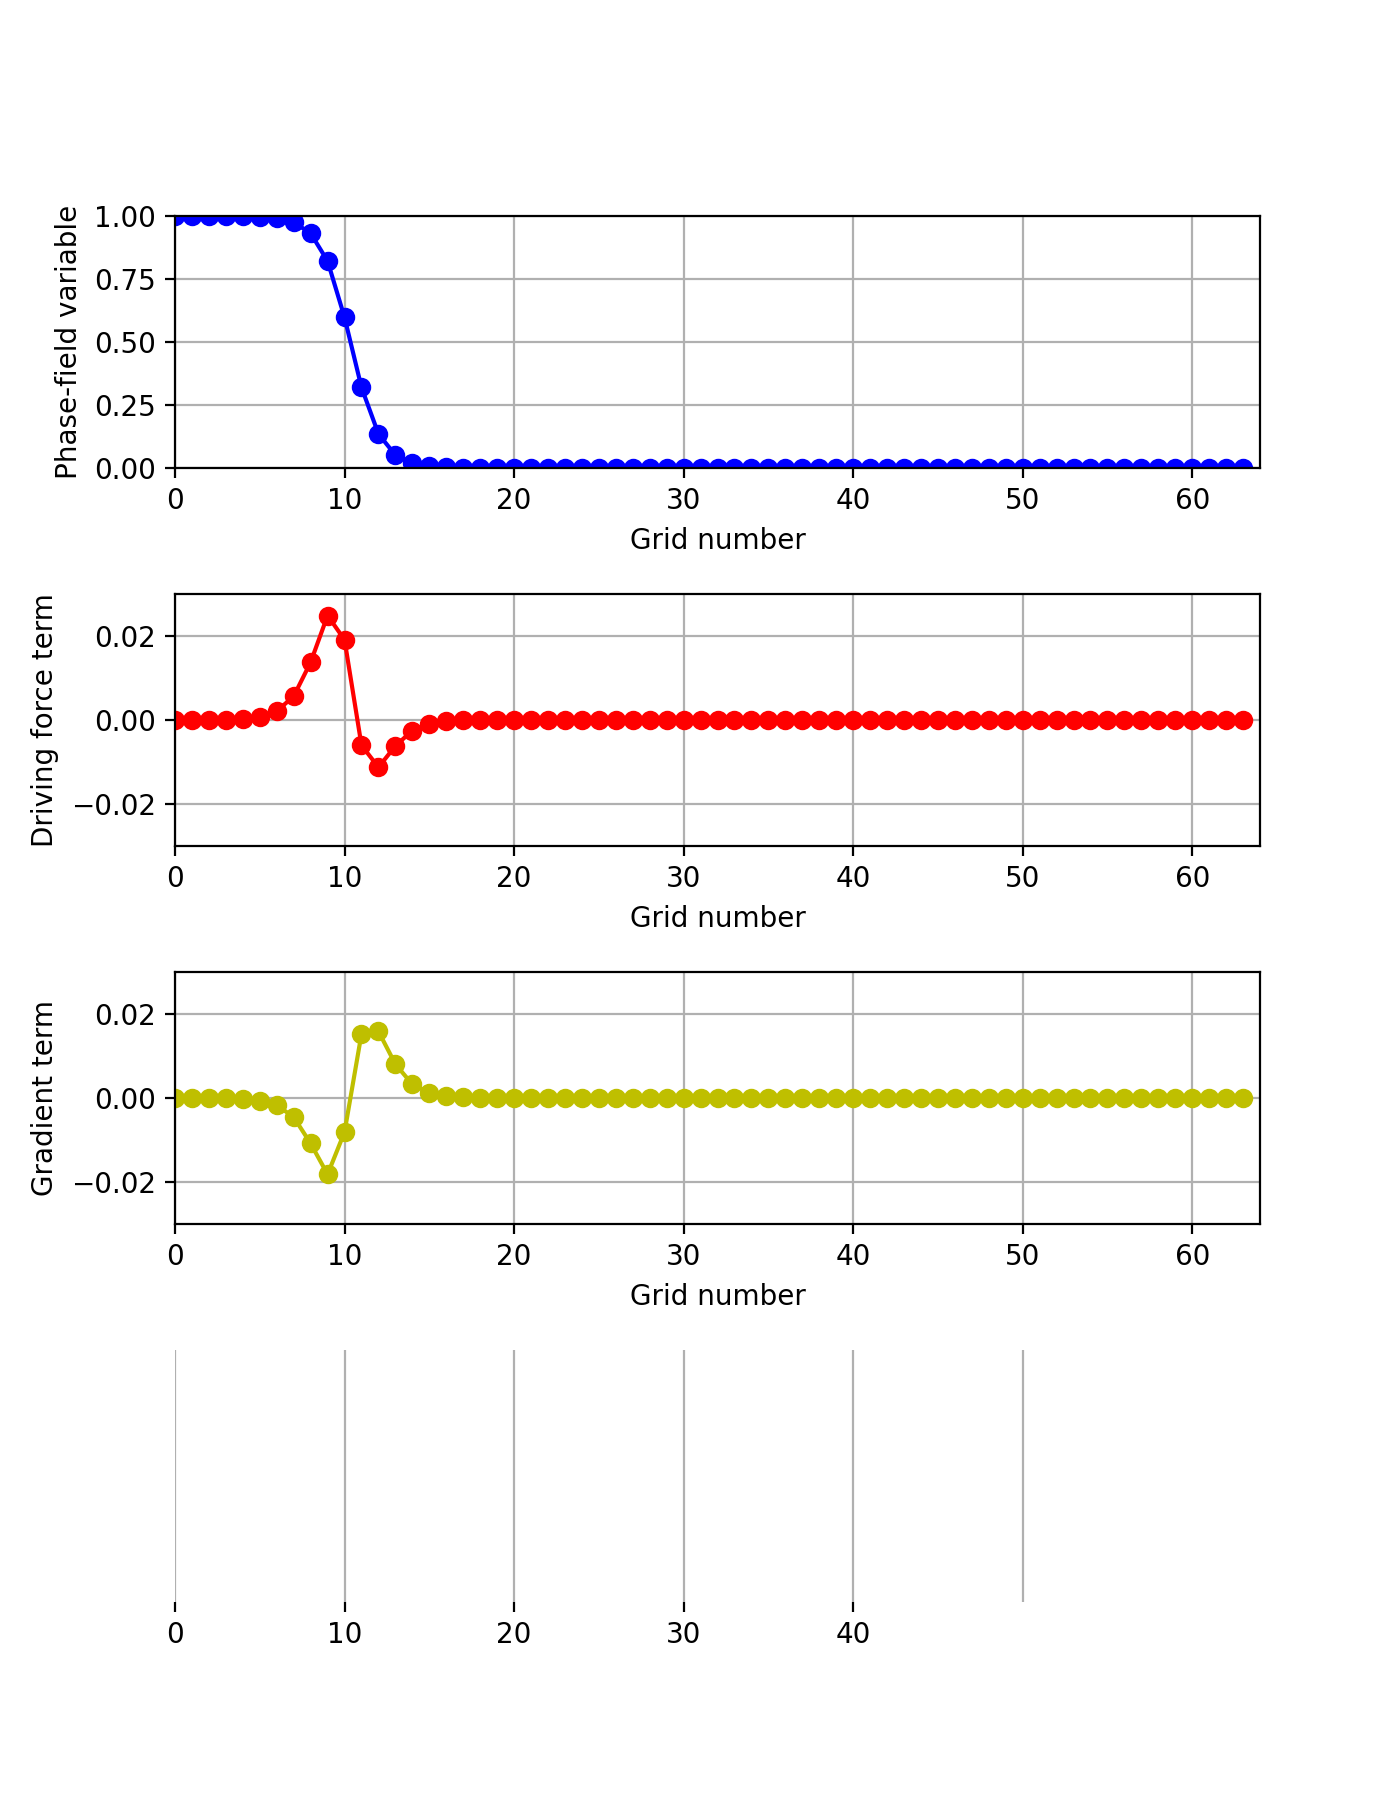

In [8]:
# calculate Allen-Cahn equation for "nsteps" times
do_timestep(p,driv,grad)

# visualize the result
fig = plt.figure(figsize=(7,9))
fig.set_dpi(100)
plt.subplots_adjust(hspace=0.5)
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

def animate(i):
    ax1.clear()
    plt.subplot(4, 1, 1)
    plt.ylim([0,1])
    plt.xlim([0,nx])
    plt.xlabel('Grid number')
    plt.ylabel('Phase-field variable')
    plt.grid(True)
    plt.plot(p[i,:],color="b",marker="o")
    ax2.clear()
    plt.subplot(4, 1, 2)
    plt.ylim([-0.03,0.03])
    plt.xlim([0,nx])
    plt.xlabel('Grid number')
    plt.ylabel('Driving force term')
    plt.grid(True)
    plt.plot(driv[i,:],color="r",marker="o")
    ax3.clear()
    plt.subplot(4, 1, 3)
    plt.ylim([-0.03,0.03])
    plt.xlim([0,nx])
    plt.xlabel('Grid number')
    plt.ylabel('Gradient term')
    plt.grid(True)
    plt.plot(grad[i,:],color="y",marker="o")
    ax4.clear()
    plt.subplot(4, 1, 4)
    plt.xlim([0,nx])
    plt.xlabel('Grid number')
    plt.ylabel('Driving + Gradient')
    plt.grid(True)
    plt.plot(grad[i,:]+driv[i,:],marker="o")
    
anim = animation.FuncAnimation(fig,animate,frames=nsteps-1,interval=100,repeat=False)
plt.show()